<a href="https://colab.research.google.com/github/ParulSrivastava98/PlayStore-App-Data-Analysis/blob/main/Play_Store_App_Review_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
df_psd=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/Play Store Data.csv')
df_psd.shape

(10841, 13)

In [78]:
import pandas as pd
df_ur=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/User Reviews.csv')
df_ur.shape

(64295, 5)

In [79]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
df_psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
df_ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [17]:
df_psd.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [18]:
df_ur.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [19]:
df_psd.describe()


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [20]:
df_ur.describe()


,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [21]:
df_psd.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [22]:
df_ur.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## In EDA what are we going to do
 *Firstly we have to find the missing values in the dataframe if any further we will deal with missing values.*



In [23]:
df_psd.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

From the above we got that the maximum null values are in the Rating Column followed by the Current Ver after that Android Ver, Content Rating and Type.

##Data may have some null, NaN or repeated/replicated values we need to find those and remove them.




In [88]:
df_psd[df_psd.duplicated(subset=['App'], keep='first')]  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


##Now we have to remove the duplicated values.

In [89]:
df_psd.drop_duplicates(subset=['App'],keep='first', inplace=True, ignore_index=True) ##Using drop
df_psd[df_psd.duplicated(subset=['App'], keep='first')]



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [90]:
df_psd.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##Further we will replace the null values with the mean value of the columns.

In [91]:
mean = df_psd["Rating"].mean()
print(mean)

4.17505184823716


For the Rating Column:

In [93]:
df_psd['Rating'].fillna(mean,inplace=True)
print(df_psd)

                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9655                                   Sya9a Maroc - FR               FAMILY   
9656                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9657                             Parkinson Exercices FR              MEDICAL   
9658                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9659      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews                S

For the Current Ver Column:

In [94]:
df_psd['Current Ver'].fillna(mean,inplace=True)
print(df_psd)


                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9655                                   Sya9a Maroc - FR               FAMILY   
9656                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9657                             Parkinson Exercices FR              MEDICAL   
9658                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9659      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews                S

For the Android Ver Column:

In [95]:
df_psd['Android Ver'].fillna(mean,inplace=True)
print(df_psd)


                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9655                                   Sya9a Maroc - FR               FAMILY   
9656                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9657                             Parkinson Exercices FR              MEDICAL   
9658                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9659      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews                S

For the Content Rating Column:

In [99]:
df_psd['Content Rating'].fillna(mean,inplace=True)
print(df_psd)

                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9655                                   Sya9a Maroc - FR               FAMILY   
9656                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9657                             Parkinson Exercices FR              MEDICAL   
9658                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9659      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating Reviews                S

For the Type Column:

In [97]:
df_psd['Type'].fillna(mean,inplace=True)


##Now checking Null values removed or not

In [100]:
df_psd.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##Now we will check for the Rating Column as the Rating needs to be between 1 and 5

In [101]:
df_psd[df_psd.Rating<1]
##To check no Ratings is below 1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [103]:
df_psd[df_psd['Rating']>5]
##To check no Ratings is above 5


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,4.175052,"February 11, 2018",1.0.19,4.0 and up,4.175052


In [105]:
df_psd.drop([9300],inplace=True)
##Droping this cell as the rating is above 5


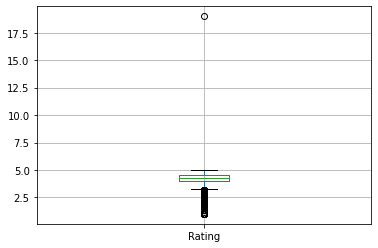

In [81]:
df_psd.boxplot()
##For checking the rating is between 1 and 5 only


## SOME OBSERVATIONS MADE ARE 





## All Apps with 5 star Rating




In [106]:
df_psd[df_psd['Rating']==5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
293,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
511,American Girls Mobile Numbers,DATING,5.0,5,4.4M,"1,000+",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
514,Awake Dating,DATING,5.0,2,70M,100+,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
532,Spine- The dating app,DATING,5.0,5,9.3M,500+,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
535,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100+,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,Mad Dash Fo' Cash,GAME,5.0,14,16M,100+,Free,0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
9563,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,"1,000+",Free,0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
9595,Monster Ride Pro,GAME,5.0,1,24M,10+,Free,0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
9639,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


##Average Apps Rating overall 

In [107]:
df_psd['Rating'].mean()


4.1735170156300825

##Top five category getting Higest average Rating



In [21]:
df_psd.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)


Category
EDUCATION              4.387778
EVENTS                 4.363647
ART_AND_DESIGN         4.350462
BOOKS_AND_REFERENCE    4.311026
PERSONALIZATION        4.307603
Name: Rating, dtype: float64

## Apps with maximum Reviews


In [22]:
max_reviews=df_psd[df_psd['Reviews'].max()==df_psd['Reviews']]['App'].head().index
df_psd['App'][max_reviews]

2989    GollerCepte Live Score
Name: App, dtype: object

##Count of Free and Paid Apps


In [23]:
df_psd['Type'].value_counts()


Free                 10039
Paid                   800
4.193338315362443        1
Name: Type, dtype: int64

##Top 5 apps having maximum installs

In [26]:
max_installs=df_psd['Installs'].sort_values(ascending=False).head().index
df_psd.iloc[max_installs]['App']

1661                             Temple Run 2
4039    Google Duo - High Quality Video Calls
385                           Viber Messenger
3562                          Google Calendar
4048                                  Dropbox
Name: App, dtype: object

##Top 5 apps having maximum Reviews

In [25]:
max_Reviews=df_psd['Reviews'].sort_values(ascending=False).head().index
df_psd.iloc[max_Reviews]['App']

2989               GollerCepte Live Score
4970         Ad Block REMOVER - NEED ROOT
2723                  SnipSnap Coupon App
2705                  SnipSnap Coupon App
3079    US Open Tennis Championships 2018
Name: App, dtype: object

##DATA VISUALIZATION

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Topmost categories in playstore

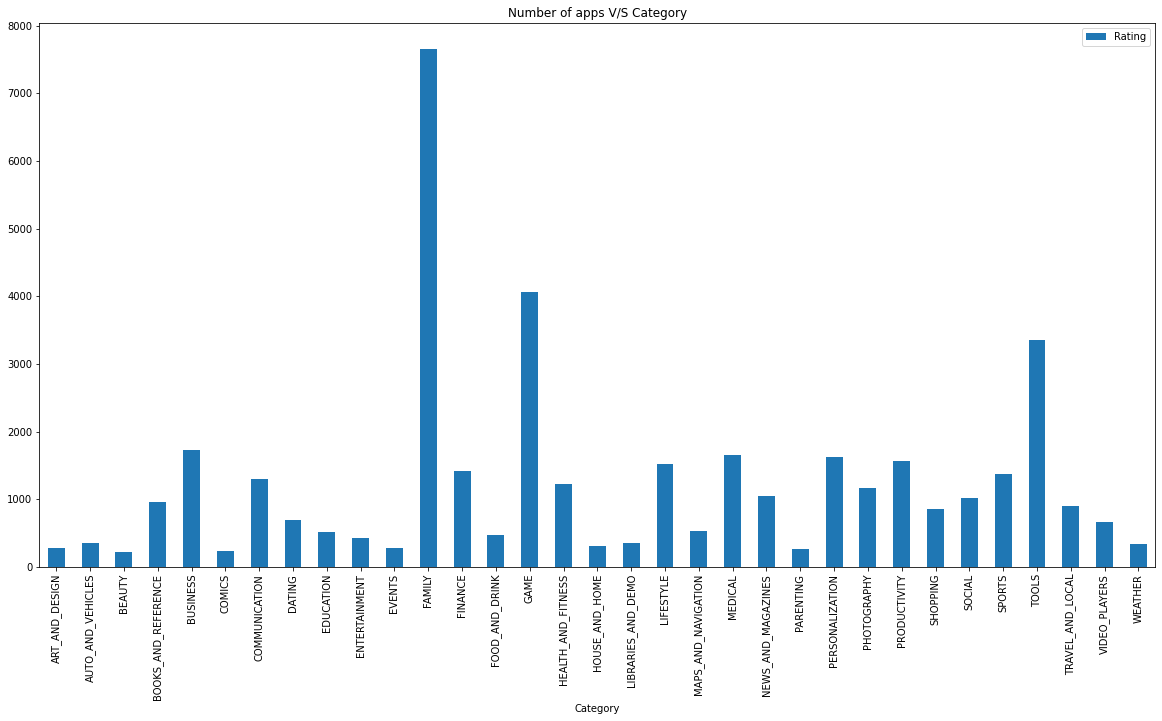

In [108]:
df_psd.groupby('Category').sum().plot.bar(figsize=(20,10))
plt.title("Number of apps V/S Category");

The observations made from this is that the category Family is the most populary used category by play store users.
After that, Game and Tools is the highest used category by play store users, followed by business medicals etc.

## Using pie-chart to find out the Applications Category mostly used by the users of Playstore.

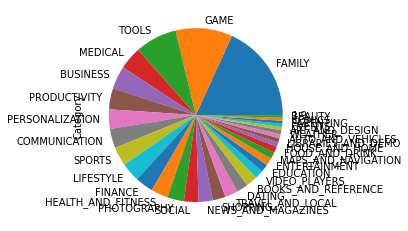

In [84]:
# Showing each category in the application.
df_psd.Category.value_counts(normalize=True)

#plot the pie chart of categories
df_psd.Category.value_counts(normalize=True).plot.pie()
plt.show()

From the above pie chart we can analyze that the popularly used categories are Family, games and tools. After that comes medical and business while other categories comprises of very less part of the pie chart.

## We are taking three columns under consideration to draw any inferences from it.
##The columns are namely Installs, Size and Rating.

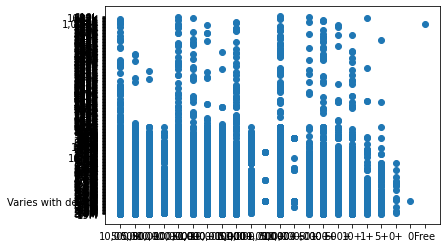

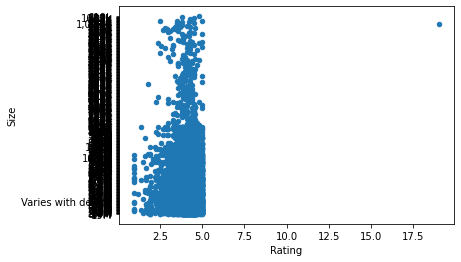

In [70]:
#plot the scatter plot of Installs and Size variable in data

plt.scatter(df_psd.Installs,df_psd.Size)
plt.show()

#plot the scatter plot of rating and Size variable in data
df_psd.plot.scatter(x="Rating", y="Size")
plt.show()

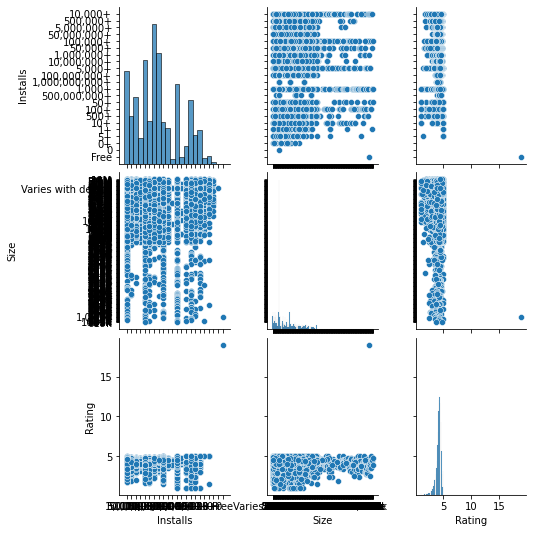

In [68]:
sns.pairplot(data = df_psd, vars=['Installs','Size','Rating'])
plt.show()

##Content Rating Category

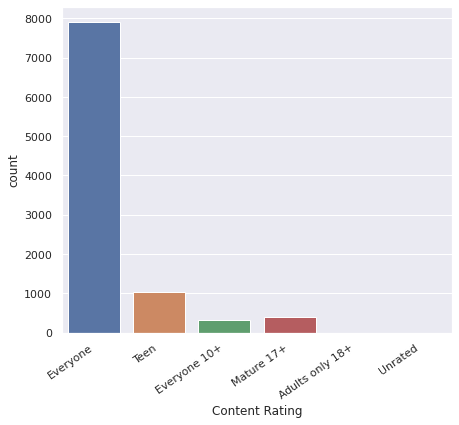

In [114]:
plt.figure(figsize=(7,6))
plt.xticks(rotation = 35, ha = 'right')
ax = sns.countplot(x='Content Rating',data=df_psd)

From the above count plot 'Everyone' Category is the widely used set of content rating followed by developers making playstore age-friendly. Most of the applications can be accessed by every age group.

##Graph for Sentiment Analysis (User Reviews)

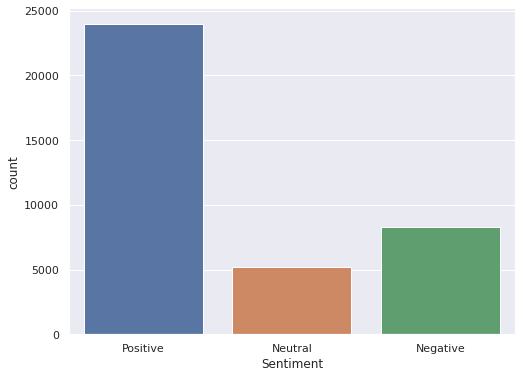

In [111]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1)
sns.countplot(x = "Sentiment",data =df_ur)
plt.show()

The graph shows maximum sentiment are positive, positive sentiment shows user satisfaction with the application. Then comes the second highest as negative sentiment and neutral sentiment is the last one.

##Displot showing normal Rating Distribuition analysis




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


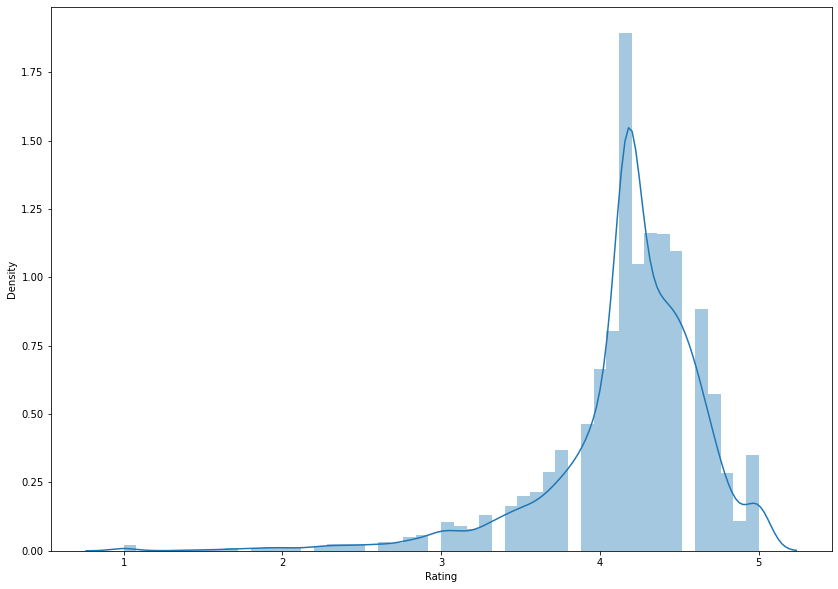

In [110]:
sns.distplot(df_psd["Rating"]) ##Distribuition of Rating


It gives the inference that the ratings are more between 4.0 and 5.0, which implies more the rating the better the applications is liked by the users. Also it tells about the customer satisfaction.

##Relationship between Rating and Size is shown using Jointplot

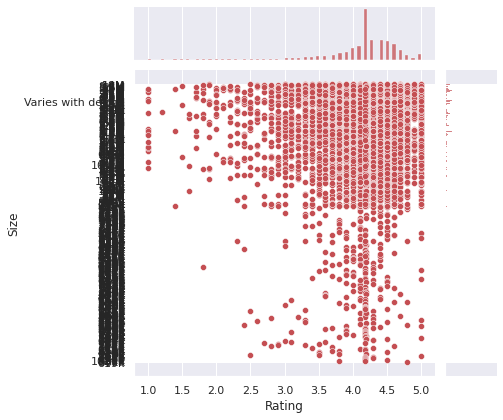

In [126]:
import seaborn as sns
sns.jointplot(x = "Rating", y = "Size", kind = "scatter", color='r', data = df_psd)

# Showing the plot
plt.show()

From this jointplot the inference is that the applications having size around 30MB had the rating between 4.0 to 4.5MB. And so we can conclude that applications which are smaller in size, like less than 20MB,can have a 5.0 rating. Since, it is more preferred by users.